<a href="https://colab.research.google.com/github/YUBO-Q/Python-100-Days/blob/master/PHYSICS_H190_Hands_on_1_Intro_to_Python_and_ML_with_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction
This notebook is designed to introduce you to training deep learning models in pytorch.

The notebook is laid out as follows:


1.   Basic python: introduction to varaibles, functions, object-oriented programming, and pytorch tensors
2.   Autodifferentiation: Learn how forward- and reverse-mode mode autograd works, a foundational tool which makes training deep learning models possible, and is quite useful for non-deep-learning things as well.
3.   Gradient Descent Optimization: Learn how gradient descent optimization works, again essential for deep learning and nearly as essential for pretty much the rest of science.
4.   Machine Learning: Learn how to design and train a perceptron from scratch.

Each section will open with introductory examples and light exercise questions to teach you how to do the titular thing, and conlcude with an exercise which will force you to demonstrate what you have learned.



## Basic Python

### Variables and datatypes



Computer programs are like factory conveyor belts, passing data from one step in the process to the next, changing/removing/adding to it at each stage. This data is classified into a number of datatypes, which describe what kind of value a particular pice of data describes. For example:

*   A string (`str`) is a piece of text.
*   An integer (`int`) is a whole number from -infinity to infinity.
*   A float (`float`) is a rational number with decimal places.

We call the pieces of data `variables`, since we can in general change them. A variable is fundamentally a collection of binary code sitting somewhere in memory, usually the RAM when you are actively working with it in python. To use this data, you need to be able to tell the computer which chunk of data in memory it occupies. We therefore give each piece of data one or more names called `pointers`.

Python has automatic garbage collection, which means the python interpreter constantly checks whether all pointers to a particular variable have been deleted or reassigned to a different variable. If this happens, the variable is deleted. This does not happen automatically in some languages like C, as it adds a little bit of comptuational overhead, but makes it much easier to avoid overfilling your RAM with decapitated junk. I will use the terms variable and pointer interchangably most of the time since usually each variable will only have one pointer, but they are different.


In [ ]:
import sys #We will need functions in the sys package. This module comes with python, but we need to let the computer know we want to use it first.
aStringVariable = 'flamingo' # Here, we have just defined a new variable, a pice of text reading 'flamingo'. aStringVariable is a pointer we assign to 'flamingo'.
print(sys.getsizeof(aStringVariable)) #This is the size of the variable in bytes. One byte is a string of 8 0/1 bits sitting next to each other in memory.

57


In [ ]:
aStringVariable = 'flamingos' # Here, we have just reassigned aStringVariable to a new piece of text, 'flamingos'. Since the old peice of text no longer has any active pointers, it was just deleted buy the garbage collector
print(sys.getsizeof(aStringVariable)) #This is the size of the new variable in bytes. Notice it is one byte longer. Each variable has a lot of overhead associated with it, hence the extra 49 bytes doing something other than recording letters.

58


In [ ]:
print(type(aStringVariable)) #Here, we print the datatype of aStringVariable. It is a 'str' datatype, a string.

<class 'str'>


In [ ]:
anIntegerVariable = 42 #Now, let's define an integer variable. Admit it, you already knew which integer I was going to choose.
print(type(anIntegerVariable)) #Sure enough, it is an 'int', an integer

<class 'int'>


In [ ]:
aFloatVariable = 42.24 #Now, let's define a float variable. If it has decimals, python will assume it is a float (specifically a float32, with 32 bits assigned to it: one for sign, eight for the integer part, 23 for the decimal. This is only accurate up to a certain number of decimal places, called the "machine precision")
print(type(aFloatVariable)) #Sure enough, it is a 'float'

<class 'float'>


Different datatypes can do different things. Sometimes we can combine two values of different datatypes; sometimes we can't. Sometimes we can convert one datatype to another; sometimes we can't. Best way to figure it out is to experiment! Try mixing and matching the variables below, and see what the result is.

In [ ]:
string1 = 'a'
string2 = 'b'
int1 = 1
int2 = 2
float1 = 3.675
float2 = 4.114

For example, we can subtract an `int` from a `float`, and the result is a `float`

In [ ]:
floatIntDifference = float1-int2
print(floatIntDifference)
print(type(floatIntDifference))

1.6749999999999998
<class 'float'>


But we can't add a `str` and a `float`

In [ ]:
floatStringSum=float1+string2 #The error message tells you the operation + cannot be used when one varaible is a float and the other a str

TypeError: unsupported operand type(s) for +: 'float' and 'str'

### Functions

A python function works just like a mathematical function: one or more values are inputted as arguments, and one or more values are returned. We've already been using some functions: `type()`, for example, is a function which accepts any variable as an argument, and returns a special `'type'` datatype describing what kind of data it is. We can also define our own functions

In [ ]:
def addSubtract(a,b = 2): #Here, we define a function called "addSubtract" with two arguments, "a" and "b". b's default argument is 2; if we call the function without specifying b, b will equal 2
    sumValue = a+b #Within the function we can define new variables as we like. These varaibles only exist in the function; nothing outside the function knows what "sumValue" is
    differenceValue = a-b
    return sumValue,differenceValue #This function returns two values, the sum and the difference

testSumValue,testDifferenceValue = addSubtract(1,3) #We call the function and get the output
print(testSumValue)
print(testDifferenceValue)


testSumValue,testDifferenceValue = addSubtract(1) #If we do not specify b, b will default to 2
print(testSumValue)
print(testDifferenceValue)

4
-2
3
-1


### Pytorch Tensors

A `Tensor` is PyTorch's primary data structure. It's very similar to a NumPy `array` but can run on CPU or GPU, and it integrates with PyTorch's `autograd` system for automatic differentiation.

Key points:
- A tensor is an n-dimensional array.
- PyTorch tensors can be moved to a GPU to speed up computations if one is available.
- They can have a flag `requires_grad` that allows PyTorch to track operations on them for gradient computation.

Below, we’ll create, inspect, and manipulate simple tensors.

In [ ]:
import torch
# --- Part 1: Creating and Inspecting Tensors ---

# 1.1 Create a tensor from a Python list
data_list = [1.0, 2.0, 3.0]
tensor_from_list = torch.tensor(data_list)
print("Tensor from list:", tensor_from_list)

# 1.2 Create a 2D tensor (matrix) using a list of lists
matrix_data = [[1, 2, 3],
               [4, 5, 6]]
tensor_2d = torch.tensor(matrix_data)
print("2D Tensor:\n", tensor_2d)

# 1.3 Create a tensor with random values
random_tensor = torch.randn(3, 3)  # shape (3x3)
print("\nRandom tensor:\n", random_tensor)

# 1.4 Check attributes
print("\nTensor shape:", random_tensor.shape)
print("Tensor dtype:", random_tensor.dtype)
print("Tensor device:", random_tensor.device)  # typically 'cpu', unless moved to GPU

# 1.5 Move tensor to GPU if available (just a demonstration)
if torch.cuda.is_available():
    random_tensor_gpu = random_tensor.to('cuda')
    print("Tensor device after .to('cuda'):", random_tensor_gpu.device)
else:
    print("CUDA not available, using CPU.")

Tensor from list: tensor([1., 2., 3.])
2D Tensor:
 tensor([[1, 2, 3],
        [4, 5, 6]])

Random tensor:
 tensor([[-0.2773, -0.3788,  1.2081],
        [-0.6386,  0.4494, -0.6825],
        [-1.2075, -0.4826, -0.8559]])

Tensor shape: torch.Size([3, 3])
Tensor dtype: torch.float32
Tensor device: cpu
CUDA not available, using CPU.


**Note**: By default, PyTorch tensors are created on the CPU. If you have a GPU and want your tensor to reside there for faster computation, you can move it by calling:
```python
tensor = tensor.to("cuda")```

 Transforming Tensor Dimensions

Manipulating tensor dimensions is a frequent task:
1. **`reshape` / `view`**: Change the shape of a tensor without changing its contents.
2. **`unsqueeze` / `squeeze`**: Add or remove dimensions of size 1.
3. **`permute`**: Rearrange dimensions.

**Pitfall**: Always ensure that when you reshape, the number of elements remains consistent.

In [ ]:
# --- Part 2: Reshaping & Dimension Operations ---

# Create a 1D tensor of 12 elements
t = torch.arange(12)  # [0, 1, 2, ..., 11]
print("Original t:", t)
print("Original shape:", t.shape)

# 2.1 reshape (or view)
t_reshaped = t.reshape(3, 4)  # shape [3,4]
print("\nReshaped to [3, 4]:\n", t_reshaped)

# 2.2 unsqueeze: add a dimension of size 1
t_unsqueezed = t_reshaped.unsqueeze(dim=0)  # adds a dimension at index 0
print("\nUnsqueezed shape:", t_unsqueezed.shape)

# 2.3 squeeze: remove dimensions of size 1
t_squeezed_back = t_unsqueezed.squeeze(dim=0)
print("Shape after squeeze:", t_squeezed_back.shape)

# 2.4 permute: rearrange dimensions (commonly used for [H,W,C] -> [C,H,W], etc.)
# We'll create a 3D tensor for demonstration
t_3d = torch.randn(2, 3, 4)  # shape [2,3,4]
print("\nOriginal t_3d shape:", t_3d.shape)

# Suppose we want to swap dimension 0 and 1
t_permuted = t_3d.permute(1, 0, 2)
print("Permuted t_3d shape:", t_permuted.shape)

Original t: tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
Original shape: torch.Size([12])

Reshaped to [3, 4]:
 tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

Unsqueezed shape: torch.Size([1, 3, 4])
Shape after squeeze: torch.Size([3, 4])

Original t_3d shape: torch.Size([2, 3, 4])
Permuted t_3d shape: torch.Size([3, 2, 4])


**Key lesson**:
- Make sure your reshaping is consistent with the total number of elements.
- `squeeze()` only removes dimensions of size 1, so if there's no dimension of size 1, it does nothing (unless you specify a dimension).
- `permute()` is often used to reorder dimensions for certain operations (e.g., convolution layers often expect `[Batch, Channels, Height, Width]` format).

Basic Arithmetic with Tensors

PyTorch supports element-wise operations like `+`, `-`, `*`, `/`, as well as matrix multiplication via `@` or `torch.matmul`.

**Be careful** with shape mismatches; PyTorch uses **broadcasting** rules, similar to NumPy, to make operations work if possible.

In [ ]:
# --- Part 3: Arithmetic ---

# 3.1 Simple element-wise operations
a = torch.tensor([1, 2, 3], dtype=torch.float)
b = torch.tensor([10, 20, 30], dtype=torch.float)

print("a:", a)
print("b:", b)
print("\nElement-wise addition: a + b =", a + b)
print("Element-wise multiplication: a * b =", a * b)

# 3.2 Broadcasting example
A = torch.randn(2, 3)
B = torch.randn(3)  # shape [3]
# B has fewer dimensions, but it can broadcast across the first dimension
C = A + B
print("\nBroadcasted addition:\nA shape:", A.shape, "\nB shape:", B.shape, "\nResult shape:", C.shape)

# 3.3 Matrix multiplication
D = torch.randn(2, 3)
E = torch.randn(3, 4)
F = torch.matmul(D, E)  # or D @ E
print("\nMatrix multiplication result shape:", F.shape)  # should be [2,4]


a: tensor([1., 2., 3.])
b: tensor([10., 20., 30.])

Element-wise addition: a + b = tensor([11., 22., 33.])
Element-wise multiplication: a * b = tensor([10., 40., 90.])

Broadcasted addition:
A shape: torch.Size([2, 3]) 
B shape: torch.Size([3]) 
Result shape: torch.Size([2, 3])

Matrix multiplication result shape: torch.Size([2, 4])


**Broadcasting**:
- When shapes differ, PyTorch attempts to align them from the **rightmost** dimension going left.
- If one shape has 1 or is missing a dimension, it can be "stretched" to match the other shape.
- If shapes are incompatible, you'll see a `RuntimeError: The size of tensor a (X) must match the size of tensor b (Y)`.

---

### Loops and decision trees

Suppose we want to do the same thing many times in a row. For example, suppose I have a string, and I want to seperate each character as elements in a list. I can do it with either a `for` loop or a `while` loop.

In [ ]:
myString='flamingos'
myList=[] #Start with an empty list

#Using a for loop:
for character in myString: #The for loop runs as many times as there are items in myString. Each iteration, character= the next item
    myList.append(character)
    print('We just added '+character+' to the list, which now reads '+str(myList))

myList=[]
#Using a while loop:
i=0
while i<len(myString): #The while loop runs until the condition is False.
    myList.append(myString[i])
    print('We just added '+myString[i]+' to the list, which now reads '+str(myList))
    i+=1

We just added f to the list, which now reads ['f']
We just added l to the list, which now reads ['f', 'l']
We just added a to the list, which now reads ['f', 'l', 'a']
We just added m to the list, which now reads ['f', 'l', 'a', 'm']
We just added i to the list, which now reads ['f', 'l', 'a', 'm', 'i']
We just added n to the list, which now reads ['f', 'l', 'a', 'm', 'i', 'n']
We just added g to the list, which now reads ['f', 'l', 'a', 'm', 'i', 'n', 'g']
We just added o to the list, which now reads ['f', 'l', 'a', 'm', 'i', 'n', 'g', 'o']
We just added s to the list, which now reads ['f', 'l', 'a', 'm', 'i', 'n', 'g', 'o', 's']
We just added f to the list, which now reads ['f']
We just added l to the list, which now reads ['f', 'l']
We just added a to the list, which now reads ['f', 'l', 'a']
We just added m to the list, which now reads ['f', 'l', 'a', 'm']
We just added i to the list, which now reads ['f', 'l', 'a', 'm', 'i']
We just added n to the list, which now reads ['f', 'l', 

An `if-else` statement checks if a condition is True. If it is, we do one thing. If not, we either do nothing, do something else, or check another condition.

In [ ]:
text1='a'
text2='b'
if text1!='c':
    print("text1=='a', not 'c', so this was true, and it executes this code")

if text1==text2:
    print("text1!=text2, so it does not execute this code")
else:
    print("instead, it executes this code")

if text1=='b':
    print("text1!='b', so it does not execute this code")
elif text1=='a':
    print("text1=='a', so it executes this code")
else:
    print("One of the previous blocks executed, so it skips this code")

text1='a', not 'c', so this was true, and it executes this code
instead, it executes this code
text1=='a', so it executes this code


### Objects and classes


Most things worth your time in python are object-oriented, based on classes and objects. These are ways of organizing large numbers of variables. Most of the things we use to define, train, and use our neural networks will be objects.

A `class` is a particular set of properties which describe all objects of that class. You might have noticed that `type()` returns something that reads "<class 'str'>" or something like that. That's because `str`, `int`, etc. are actually all classes. When we define a variable, we create an instance of the class; `instanceName=className()`. The instance `instanceName` immediately has all the default `attributes` of the class, plus one or more unique attributes created when we define it that no other instances will have. It also has a range of `methods` which only memebers of the class can use. Often, a class is a subtype of a broader class.

Variables associated with a class are called `attributes`, and are accessed with `[instanceName].[attributeName]`. Functions associated with a class are called `methods`, and are accessed with `[instanceName].[methodName]()`.

For example, suppose we have a class called `car`. Every `car` has a number of default attributes, and default methods

In [ ]:
class car: #This is the name of the class

    # Every class has an __init__() method. This method is automatically called when we create an instance of the class.
    def __init__(self,make,model):
        #When we call the car class, we need to provide it with two variables, so e.g. myCar=car(make='Fiat',model='500e').
        # "self" is a special argument every method will have. If you call "self" in a method, it accesses the current value of any
        # attribute, or calls any function, in the class.

        #Here, we define attributes using the "self" keyword. If we do not define an attribute with "self", we will NOT be able
        #to access it outside the current method
        self.make=make
        self.model=model
        self.wheels=4 #We used "self" when defining "wheels". So, car.wheels exists.
        roof=True #We did not use "self" when defining "roof". So, car.roof does not exist.
        self.engine=True
        #Yes, we're working in miles.
        self.milesDriven=0

    #Other methods will only be called when the user (or another method) calls them.
    def drive(self,distance):
        #We can modify attributes using "self". Notice milesDriven has NOT been defined within this method. However, since it was
        #defined elsewhere in the object at some point before drive() is called (in our case, in the __init__() method), we can
        #access it - and change it - as if it were a local variable. The new value will now be seen whenever car.milesDriven is called.
        self.milesDriven+=distance
        return

    def get_milage(self,):
        return self.milesDriven

myCar=car(make='Fiat',model='500e') #myCar is now an instance of the car class. It is an object.
print(type(myCar))
print(myCar.make)
print(myCar.model)
print(myCar.wheels)
print(myCar.engine)
print(myCar.milesDriven)
myCar.drive(100) #Once milesDriven has been updated in one method, it is permenantly changed
print(myCar.milesDriven)

yourCar=car(make='Ford',model='Focus') #Now I'm going to create another instance. yourCar is not myCar, but it is an object of class 'car'
print(type(yourCar)) #It's still a car
print(yourCar.make) #And has the same attributes, though some have different values
print(yourCar.model)
print(yourCar.wheels)
print(yourCar.engine)
print(yourCar.get_milage()) #Your car still has 0 miles driven
print(myCar.get_milage()) #My car still has 100 miles driven

<class '__main__.car'>
Fiat
500e
4
True
0
100
<class '__main__.car'>
Ford
Focus
4
True
0
100


A class can inherit properties of its parent superclass. For example:

In [ ]:
#All suvs are cars, but not all cars are suvs. suvs are a subclass of car
class suv(car):
    def __init__(self,make,model,fourWheelDrive=True):
        #At this point, suv has no attributes
        #By default, car.__init__() will not be called. super() refers to the super class, and super().__init__() calls the __init__() method of the superclass
        super(suv, self).__init__(make,model)
        #At this point, suv has the attributes make, model, wheels, engine, and milesDriven
        self.fourWheelDrive=fourWheelDrive
        #At this point, suv has the attributes make, model, wheels, engine, milesDriven, and fourWheelDrive. fourWheelDrive is an attribute which suvs have, but cars don't

    def toggle_4WD(self):
        self.fourWheelDrive=not self.fourWheelDrive #This method turns off and on four-wheel drive
        return

mySUV=suv(make='Ford',model='Bronco')
print(type(mySUV))
print(mySUV.make)
print(mySUV.model)
print(mySUV.wheels)
print(mySUV.engine)
mySUV.drive(200) #suv has inherited the drive() method from car
print(mySUV.milesDriven)
print(mySUV.fourWheelDrive)
mySUV.toggle_4WD()
print(mySUV.fourWheelDrive)

<class '__main__.suv'>
Ford
Bronco
4
True
200
True
False


## Autodifferentiation



Training a neural network, or any deep learning model, is a minimization problem. You have a set of parameters you can tune, usually the weight on each connection between neurons and their biases, and a loss function describing the difference between the current output of the model and the desired output. You want to change the model parameters to minimize this loss function. But how do we know whether a given parameter needs to be bigger or smaller?

The answer is usually gradient descent optimization. We find the derivative of the loss function with respect to each parameter; this derivative points in the direction of steepest ascent, so that changing that parameter by an amount given by the derivative will produce the largest possible change in the loss function. We can therefore follow the derivative through the parameter space until we reach a minimum of the loss function. We'll learn more about this process, and why it often fails, in the next section. For now, let's focus on how we get our derivative.

In theory, we could sit down with a pen and paper and manually write out the derivative of the loss function with respect to any weight or bias. The computer is built off of simple addition, subtraction, and multiplication, so all we need to to do is follow this chain of operations from our parameters to the loss function and do a chain rule. However, this would be absurdly complicated for even a tiny neural network due to the sheer number of basic operations involved.

An alternative is numeric derivatives, where we change our parameters by a tiny amount and observe how the loss function changes; in the limit as the change goes to 0, this is the derivative. However, this requires us to change one parameter at a time, evaluating the whole network each time we do so, and we don't want to sit around until the heat death of the universe waiting for our perceptron to make one pass through the data.

Autodifferentiation lets us efficiently compute our derivative by effectively automating the pen-and-paper strategy of threading a chain rule through all the basic operations which transform our parameters into our loss function. From the perspective of the user, it can often seem like magic. But autodifferentiation is a tricky process which is very easy to break if you don't understand what the computer is actually doing, especially if you're writting your own custom loss function, activation functions, etc.

In this section, we will introudce autodifferentiation using pytorch as our autograd engine. We will:
1. Manually implement forward-mode autodiff for a simple function $f(x_1,x_2) = x_1 \cdot x_2 + \sin(x_1)$.
2. Manually implement reverse-mode autodiff.
3. Demonstrate pytorch's built in reverse-mode autodifferentiation machinery.
4. Conclude with an **exercise** for manually implementing reverse-mode autodiff for the **Himmelblau function**:
   \[
   f(x,y) = (x^2 + y - 11)^2 + (x + y^2 - 7)^2
   \]\\
   and compare that to PyTorch’s computed gradient.

In the second section of the notebook, we will use autodifferentiation to perform gradient descent optimization. In the final section of the notebook, we will use it to train a perceptron.

###1. Forward-Mode Autodifferentiation



Let's consider a simple function $f(x_1,x_2)=x_1\cdot x_2+\sin(x_1)$. This is entirely equivalent to a neural network loss function, where $x_1$ and $x_2$ are our parameters and $f(x_1,x_2)$ is the loss. We want to find $df/dx_1$ and $df/dx_2$.

 When the computer evaluates this function, it does it one peice at a time; first it computes $sin(x_1)$, then $x_1*x_2$, then finally adds the results to get $f(x_1,x_2)$. We can represent this as a computational graph:  ![450px-ForwardAccumulationAutomaticDifferentiation.png](https://drive.google.com/uc?export=view&id=170Flj6w0OcJHSm50KqNxXMg-TOfARnqJ)

Each $w_i$ is called a node of the graph. The graph flows upward. Nodes which feed into $w_i$ are $w_i$'s parents. Nodes which come out of $w_i$ are $w_i$'s children. Nodes with no parents are leaves. Nodes with no children are roots.

In [ ]:
from math import sin
x1 = 2  # Example value for x1
x2 = 3  # Example value for x2
w1 = x1 # Each step in the comutational tree is called a node. A node with no parents (other nodes below it) is a leaf. The leaf nodes are the parameters we want to take derivatives with respect to. w1 is a leaf node
w2 = x2 # w2 is also a leaf node
w3 = w1*w2 # To find f, we first need to multiply nodes w1 and w2 to get a new node w3
w4 = sin(w1) # We also need to take the sine of node w1 to get node w4.
w5 = w3+w4 # Now we can get node w5 by adding nodes w3 and w4. This is the root node, which is the parent of no one.
f = w5 # Node w5 is f(x1,x2).
print(f)

6.909297426825682


This might seem like a painfully slow way to implement such a simple function, but this is exactly what the computer sees if you implement `f=x1*x2+sin(x1)` all at once.

Now let's find some derivatives. First, let's use forward-mode autodifferentiation. In forward-mode differentiation, we take the derivatives of f starting from leaf nodes and working up to the root node. At each node, we compute not only the value $w_i$ (called the primal), but also its derivative $\dot{w}_i$ (called the tangent).

But the derivative with respect to what? In the first forward sweep, we do derivatives with respect to $x_1$, so that $\dot{v}=dv/dx_1$. In the second forward sweep, we do derivatives with respect to $x_2$, so that $\dot{v}=dv/dx_2$. If we had more than two arguments, we would need to do one sweep per agrument.

Graphically, this looks like this:

 ![450px-ForwardAccumulationAutomaticDifferentiation.png](https://drive.google.com/uc?export=view&id=1GncgwGLijOfYkYPnk5MmSv0cWRv9uaiW)

To get our derivatives then, we do the first forward sweep:

In [ ]:
from math import sin, cos

x1 = 2 # Example value for x1
x2 = 3 # Example value for x2

w1 = x1 # The first leaf node. We do the derivative wrt this one on the first forward sweep
dw1 = 1 # dw1/dx1 = dx1/dx1 = 1. Fixed derivative values on the leaf nodes are called "seed" values, and defines which leaf we are doing derivatives with respect to.

w2 = x2 # The second leaf node. We will do derivatives wrt this one in the next sweep.
dw2 = 0 # dw2/dx1 = dx2/dx1 = 0, another seed value

w3 = w1*w2
dw3 = dw1*w2 + w1*dw2 # A simple product rule

w4 = sin(w1)
dw4 = cos(w1)*dw1 # A simple derivative of sine

w5 = w3+w4
dw5 = dw3 + dw4 # A simple sum rule

f = w5
dfdx1 = dw5 # Now we have dfdx1!
print(dfdx1)

2.5838531634528574


Now the second forward sweep:

In [ ]:
x1 = 2  # Example value for x1
x2 = 3  # Example value for x2

w1 = x1 # The first leaf node. We did the derivative wrt this one on the first forward sweep
dw1 = 0 # dw1/dx2 = dx1/dx2 = 0. Seed value.

w2 = x2 # The second leaf node. We do the derivative wrt this one now.
dw2 = 1 # dw2/dx2 = dx2/dx2 = 1. Seed value

w3 = w1*w2
dw3 = dw1*w2 + w1*dw2 # A simple product rule

w4 = sin(w1)
dw4 = cos(w1)*dw1 # A simple derivative of sine

w5 = w3+w4
dw5 = dw3 + dw4 # A simple sum rule

f = w5
dfdx2 = dw5 # Now we have dfdx2!
print(dfdx2)

2.0


When you call `torch.autograd.grad()` in forward mode, the computer performs exactly this analysis under the hood.

Have you noticed a problem with forward-mode autodiff? We need to choose one leaf to use as our differentiation variable at a time, so we need to do one sweep for every leaf/parameter in our model - highly inefficient for scalar-valued loss functions.



###2. Reverse-Mode Autodifferentiation


Luckily, there's a better way: We can start from the root, at the top of the tree, and work down to the leaves to get the derivative, thereby finding both $df/dx_1$ and $df/dx_2$ in a single backwards sweep. This is called backward-mode autodifferentiation, and is what you will almost always use when training deep learning models.

Graphically, this process looks like this:

 ![450px-ForwardAccumulationAutomaticDifferentiation.png](https://drive.google.com/uc?export=view&id=1dlN6Z32DHVPW0Iv_RVICtmC_i_Prh_ZG)

Rather than finding the derivative at each node, we instead find the adjoint $\bar{w}_i=df/dw_i$, and chain them together in a process called backgropagation.

Let's see how it works

In [ ]:
import math

class Node: # To build our own reverse-mode derivative, we need to define a Node class for our computational tree.
    """
    A node in the computational graph for reverse-mode autodiff.
    'value' is the numeric value at this node.
    'grad' is the gradient of the final output (f(x1,x2)) w.r.t. this node.
    'op' is a function that, given this node's gradient, will backprop to its parent nodes.
    'parents' is a list of parent Nodes.
    """
    def __init__(self, value, parents=None, op=None):
        self.value = value
        self.grad = 0.0  # Will hold derivative of output w.r.t. this node. It will be updated when backward() is called
        self.parents = parents if parents else [] # Parent nodes are nodes immediately above this one in the computational graph, whose data flows into this node
        self.op = op  # A backprop function

    def backward(self, grad_output=1.0):
        """
        Recursively apply chain rule to accumulate gradients in parents.
        """
        # Accumulate gradient from children
        self.grad += grad_output

        # Propagate to parents
        if self.op is not None:
            self.op(grad_output)

def multiply_node(a, b):
    """
    a * b
    """
    value = a.value * b.value

    def _op(grad_output):
        # d/d(a) of a*b = b.value
        # d/d(b) of a*b = a.value
        a.backward(grad_output * b.value)
        b.backward(grad_output * a.value)

    return Node(value, parents=[a, b], op=_op)

def add_node(a, b):
    """
    a + b
    """
    value = a.value + b.value

    def _op(grad_output):
        # d/d(a) of (a+b) = 1
        # d/d(b) of (a+b) = 1
        a.backward(grad_output)
        b.backward(grad_output)

    return Node(value, parents=[a, b], op=_op)

def sin_node(a):
    """
    sin(a)
    """
    value = math.sin(a.value)

    def _op(grad_output):
        # derivative of sin(a) w.r.t a = cos(a)
        a.backward(grad_output * math.cos(a.value))

    return Node(value, parents=[a], op=_op)


def f_reverse_mode(x_val, y_val):
    """
    Build computation graph for f(x, y) = x*y + sin(x),
    then run backward pass to get gradients.
    Returns partial derivatives df/dx, df/dy.
    """
    # Create leaf nodes
    w1 = Node(x_val)
    w2 = Node(y_val)

    # Forward pass: build the graph
    w3 = multiply_node(w1,w2)    # x * y
    w4 = sin_node(w1)     # sin(x)
    w5 = add_node(w3,w4)      # x*y + sin(x)

    # Backward pass from f
    w5.backward(1.0)        # d(f)/d(f)=1; triggers chain rule

    # The gradients w.r.t x and y are stored in w1.grad, w2.grad
    return w1.grad, w2.grad

# Test the reverse-mode function
x1_val, x2_val = 2.0, 3.0
df_dx1, df_dx2 = f_reverse_mode(x1_val, x2_val)

print(f"Reverse-mode: df/dx1 = {df_dx1}, df/dx2 = {df_dx2}")

Reverse-mode: df/dx1 = 2.5838531634528574, df/dx2 = 2.0


Sure enough, it is the same as the forward-mode derivatives, but we only had to do one sweep!

### 3. Pytorch's autodifferentiation

 We can confirm it is the same as `torch.tensor.backward`'s output, whcih implements exactly this kind of reverse-mode operation:

In [ ]:
import torch

# Create x and y as PyTorch tensors with `requires_grad=True` to track operations
x1 = torch.tensor(2.0, requires_grad=True)  # Example value for x
x2 = torch.tensor(3.0, requires_grad=True)  # Example value for y

# Define the function f(x1, x2)
f = x1 * x2 + torch.sin(x1)

# Let PyTorch compute the gradients
f.backward()  # This computes df/dx1 and df/dx2

print("Value of f:", f.item())
print("df/dx1:", x1.grad.item())
print("df/dx2:", x2.grad.item())

Value of f: 6.909297466278076
df/dx1: 2.583853244781494
df/dx2: 2.0


### 4. Exercise: Himmelblau gradient

Makes sense? Prove it! Deliver me the gradient of the Himmelblau function
$f(x_1,x_2)=(x_1^2+x_2-11)^2+(x_1+x_2^2-7)^2$. Here's how to do it with torch's autograd:

In [ ]:
import torch

def himmelblau_torch(x1_val, x2_val):
    x1_torch = torch.tensor(x1_val, requires_grad=True)
    x2_torch = torch.tensor(x2_val, requires_grad=True)

    # Define the function
    f_torch = (x1_torch**2 + x2_torch - 11)**2 + (x1_torch + x2_torch**2 - 7)**2

    # Compute gradients via backward()
    f_torch.backward()

    return f_torch.item(), x1_torch.grad.item(), x2_torch.grad.item()

# Example usage:
x1_val, x2_val = 1.0, 2.0
f_val, dx1_torch, dx2_torch = himmelblau_torch(x1_val, x2_val)
print("PyTorch Himmelblau value =", f_val)
print("PyTorch df/dx1 =", dx1_torch, ", df/dx2 =", dx2_torch)

PyTorch Himmelblau value = 68.0
PyTorch df/dx1 = -36.0 , df/dx2 = -32.0


Now you do it manually with your own reverse-mode tree:

In [ ]:
def himmelblau_manual(x1_val, x2_val):
    # 1) Create leaf nodes:
    # x1 = Node( ... )
    # x2 = Node( ... )

    # 2) Build the graph for:
    #   a = x1^2 + x2 - 11
    #   b = x1 + x2^2 - 7
    #   f = a^2 + b^2

    #    - Use multiply_node(a, a), add_node(...), etc. from the previous code
    #    - Or implement any extra function you need (like a "square" node or "power" node)

    # 3) Call f.backward(1.0)

    # 4) Return (f.value, x1.grad, x2.grad)
    ...

# Test and compare with PyTorch:
x1_val, x2_val = 1.0, 2.0

# -- Uncomment after filling the function above --
# f_manual, dx_manual, dy_manual = himmelblau_manual(x_val, y_val)
# f_torch, dx_torch, dy_torch = himmelblau_torch(x_val, y_val)
#
# print("Manual Reverse-Mode Himmelblau:")
# print("f =", f_manual, "df/dx =", dx_manual, "df/dy =", dy_manual)
# print("PyTorch Himmelblau:")
# print("f =", f_torch, "df/dx =", dx_torch, "df/dy =", dy_torch)

## Gradient Descent Optimization

As mentioned above, training a deep learning model is a minimization problem. We have a function (the loss $L()$) which is an explicit function of the model predictions $e$ and the targets from the training data $t$. For example, if we had a DNN intended to reproduce an image, our loss function might be $L(e,t)=\sum_i|e_i-t_i|^2$ where each $e_i$ is the predicted value of pixel $i$ and $t_i$ is the true value at pixel $i$. If $L=0$, then the prediction perfectly matches reality.

Our network has a large number of variables we can tune, for example the weights and biases of hidden neuron layers (more on actual network architecture and what these mean in the next section). We can collect all these parameters in a vector $\phi$. $L$ is an implicit function of $\phi$, because the predictions are themselves a function of $\phi$; we actually have $L(e(\phi),t)$. Training the network thus requires updating $\phi$ to minimize $L$, and we do this using the gradient $dL/d\phi$.

 The actual algorithm used to map $dL/d\phi$ to an update $\Delta\phi$ is called a gradient descent optimizer. In this section, we will


1.   Create and use our own custom gradient descent algorithm to perform linear regression
2.   Create an optimization loop using `pytorch.optim`'s API.
3.   Apply more advanced optimizers such as Adam used in actual DNN training to the optimization problem.
4.   Conclude with an exercise in which you will find the minimum of the Himmelblau function.

In the final section of this notebook, we will use gradient descent optimization to train a perceptron.



### 1. A custom gradient descent optimizer.

In this section, we will attempt to find correllations between Pokemon attack and defense stats. Here is the data, which I've manually entered to avoid any issues with accessing .csv files:

In [ ]:
import pandas as pd
import numpy as np
df = pd.DataFrame(data=np.array([[30.,35],[52,43],[49,49],[64,58],[62,63],[48,65],[104,78],[63,80],[103,120],[100,123]]),index=['caterpie','charmander','bulbasaur','charmeleon','ivysaur','squirtle','charizard','wartortle','blastoise','venusaur'],columns=['attack','defense'])
x = torch.tensor(df['attack'])
xScaled = (x-torch.mean(x))/torch.std(x) # It is useful to scale x before doing linear regression, normalizing it by its eman and standard deviation
y = torch.tensor(df['defense'])

Make a plot of the x/y data:

In [ ]:
# Your code here
...

Ellipsis

We want to do linear regression on attack vs defense data, finding the best-fit line $y=mx+b$.

Our loss function will be the mean squared error. Our model has two parameters, the slope and intercept, so our loss function will be
$L(m,b)=\frac{1}{n}\sum_{i=1}^n((mx_i+b)-y_i)^2$

Implement this loss function. Make sure it is torch autograd-traceable

In [ ]:
# Your code here
def MSELoss(phi):
    """
    phi=a two-element pytorch tensor; the first element is m, the second is b
    Should return the MSE loss using the xScaled and y tensors defined above.
    """
    L=...
    return L


Now, we want to create a gradient descent optimization loop. We are going to use a very simple update scheme: $\Delta\phi=-\alpha\frac{dL}{d\phi}$, where the user simple chooses a constant factor $\alpha$. We will start with an initial guess $\phi_0$, and then update $\phi_i=\phi_{i-1}+\Delta\phi_{i-1}$ until we reach a maximum number of iterations.

First, write a function which performs a single update step:

In [ ]:
# Your code here
def gradient_descent_update(phi,alpha):
    """
    Performs a single update phi=phi-alpha*dL/dphi

    Arguments:
    phi: tensor. First element is slope m, second is intercept b
    alpha: float. The learning rate of this step.

    Returns:
    L_value: float. The current value of the loss function
    phi: tensor. Updated parameters
    """
    #Do a forward pass to get L_value
    L_value =...
    #Then do a backward pass to populate phi's grad attribute.
    ...
    #Update phi with the gradient and learning rate
    updated_phi =...

    # Pytorch is a bit twitchy with autograd on tesors which have in the past been modifed with their own gradient.
    # Here, I detach the updated phi to erase its gradient info, then set reguires_grad back to True before returning it.
    # Don't worry about this bit too much.
    updated_phi = updated_phi.detach()
    updated_phi.requires_grad = True
    return L_value, updated_phi


Excellent! Now, define a function which does this process many times to find the minimum

In [ ]:
def gradient_descent(phi0,alpha,steps):
    """
    Performs a number of updates and returns the final parameters and loss function value.

    Arguments:
    phi0: tensor. The initial value of the (scaled) slope and intercept
    alpha: scalar. The learning rate
    steps: int. The number of updates to perform

    Returns:
    final_L: float. The final loss function value
    phi: tensor. The final parameters
    """
    phi=phi0
    #Do a for loop over the number of steps, calling gradient_descent_update() each time to evolve phi

    for ...
    return Lv,phi.detach()

# These are good initial points for the optimization
phi0 = torch.tensor([23,70.0],requires_grad=True)

final_L, final_phi  =gradient_descent(phi0,0.1,30)

print(f"Final loss function: {final_L:.4f}, final (scaled) slope: {final_phi[0]:.4f}, final (scaled) intercept: {final_phi[1]:.4f}")

Final loss function: 206.2657, final (scaled) slope: 25.8206, final (scaled) intercept: 71.3983


Now plot your line on top of the data. Remember that we scaled x when we found slope and intercept, so unscale the slope/intercept before plotting the line!

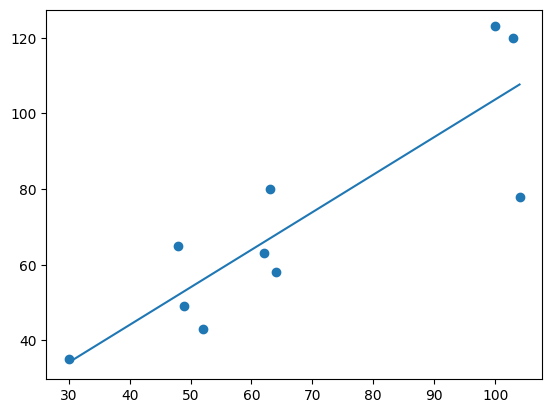

In [ ]:
# Your code here
...

What actually happened during the descent? Below is code which will plot the path the GD algorithm takes through the function's space. The background is a contour plot of `MSELoss`, and you can see the updates as points gradually getting more red.

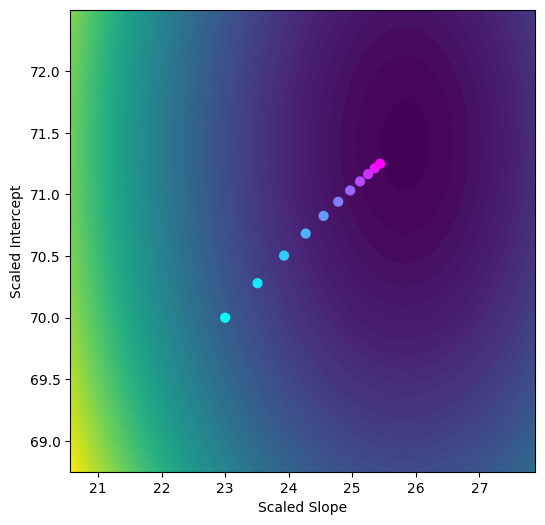

In [ ]:
def plot_descent_path(phis):
    phis = torch.vstack(phis).detach()
    phis_np = phis.numpy()
    min_vs = torch.min(phis,dim=0)[0].numpy()
    max_vs = torch.max(phis,dim=0)[0].numpy()
    dvm,dvb = max_vs[0]-min_vs[0],max_vs[1]-min_vs[1]
    xPlot,yPlot = np.linspace(min_vs[0]-dvm,max_vs[0]+dvm,200),np.linspace(min_vs[1]-dvb,max_vs[1]+dvb,200)
    X,Y = np.meshgrid(xPlot,yPlot)
    Xr,Yr = X.ravel(),Y.ravel()
    F = np.reshape(np.array([MSELoss(torch.tensor([xv,yv],requires_grad=True)).item() for xv,yv in zip(Xr,Yr)]),(200,200))
    fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(6,6))
    ax.contourf(X,Y,F,levels=100)
    phis_np = phis.numpy()

    # 1) Plot each point as a scatter
    ax.scatter(phis_np[:, 0], phis_np[:, 1], cmap="cool",c=list(range(len(phis_np))), s=40, zorder=3)

    # 2) Draw arrows from phis[i] to phis[i+1]
    for i in range(len(phis_np) - 1):
        x_start, y_start = phis_np[i]
        \
        x_end, y_end     = phis_np[i+1]

        dx = x_end - x_start
        dy = y_end - y_start

        #ax.arrow(x_start, y_start, dx, dy,
        #        length_includes_head=True,  # so the arrow ends exactly at (x_end,y_end)
        #        head_width=0.01,            # width of the arrow head
        #        head_length=0.015,          # length of the arrow head
        #        fc='red',                  # face color of the arrow head
        #        ec='red')                  # edge color of the arrow head
    ax.set_xlabel('Scaled Slope')
    ax.set_ylabel('Scaled Intercept')
    plt.show()
    return

def plot_gd(gradient_descent_update,num_steps,phi0=torch.tensor([23,70.0],requires_grad=True)):
    phi = phi0
    Lvs = []
    phis = [phi.clone()]
    for step in range(num_steps):
        Lv,phi = gradient_descent_update(phi,MSELoss,0.1)
        Lvs.append(float(Lv))
        phis.append(phi.clone())
    plot_descent_path(phis)
plot_gd(gradient_descent_update,10)



### 2. Pytorch Optimization

Now, let's use the professional optimizers in `pytorch.optim`. This works a lot like our algorithm, except the optimizer will handle the updates internally; we just need to tell it when to update.

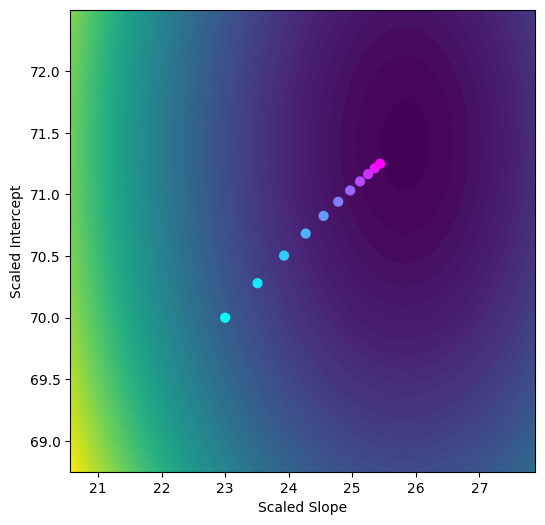

Optimized phi: [25.439249 71.24968 ]
Final loss: 206.42419384382944


In [ ]:
import torch
# torchOptimizer function
#   phi0   = initial value for phi (2-element tensor)
#   lr     = learning rate
#   steps  = number of gradient-descent steps to perform
#
# This function returns the optimized phi (2-element tensor)
# ----------------------------------------------------------
def torchOptimizer(phi0, lr, steps,lossFunc=MSELoss,optimizer=torch.optim.SGD,plot_descent=False,**hyperparameters):
    """
    Minimizes MSELoss(phi) = mean((phi - [1,2])^2) w.r.t phi
    using basic SGD (no momentum, weight decay, etc.).

    Arguments:
    phi0 : tensor. Initial value for phi.
    lr : float. Learning rate (step size).
    steps : int. Number of update steps for gradient descent.
    lossFunc : callable. A loss function, accepting phi as the argument and returning a scalar loss.
    optimizer: callable. An optimization algorithm from https://pytorch.org/docs/stable/optim.html#algorithms
    plot_descent: Bool. If True, generates a plot of the path the optimizer took through the loss function space.
    hyperparameters: Keyword arguments to be passed to the optimizer.

    Returns
    -------
    phi : tensor. The optimized phi (2-element tensor) after 'steps' iterations.
    """

    # 1. Make a copy of phi0 to avoid changing it outside the function
    #    and ensure it has 'requires_grad=True' so PyTorch tracks gradients.
    phi = phi0.clone().detach().requires_grad_(True)

    # Create an SGD optimizer from torch.optim
    # We pass 'phi' as a list since the optimizer needs an iterable of params.
    # This tells the optimizer to update phi every time we call optimizer.step().
    # SGD stands for "Stochastic Gradient Descent", which is exactly our algorithm.
    # The "stochastic" bit only applies when doing batch training on a deep learning model.
    optimizer = optimizer([phi], lr=lr,**hyperparameters)
    phis = [phi.clone().detach(),]
    # 2. Optimization loop
    for step_i in range(steps):

        # a) Zero the gradients from any previous iteration
        optimizer.zero_grad()

        # b) Compute the loss for the current phi
        loss_value = lossFunc(phi)

        # c) Backpropagate: compute gradients of loss w.r.t. phi
        loss_value.backward()

        # d) Update phi using the optimizer
        optimizer.step()
        phis.append(phi.clone().detach())
        # (Optional) Print progress
        # print(f"Step {step_i+1}/{steps}, phi={phi.data.numpy()}, loss={loss_value.item():.4f}")

    if plot_descent:
        plot_descent_path(phis)
    # 3. Return the final learned parameter
    return phi

# ----------------------------------------------------------
# Example usage:
#   Start from our same phi0
#   do 10 steps of SGD with learning rate = 0.1
# ----------------------------------------------------------
phi_init = torch.tensor([23,70.0],requires_grad=True)

learned_phi = torchOptimizer(phi_init, lr=0.1, steps=10,plot_descent=True)

print("Optimized phi:", learned_phi.data.numpy())
print("Final loss:", MSELoss(learned_phi).item())

We ended up in the same place! Not surprising, since that's the minimum and it's the same algorithm.

### 3. Advanced Gradient Descent Algorithms

Basic gradient descent is actually pretty bad. It suffers from several problems:


*   If we choose the learning rate to be too small, we'll be waiting forever to find the minimum
*   If we choose the learning rate to be too large, the algorith will "circle the drain", just orbiting the minimum without ever reaching it
*   If we have more than one local minimum (hint: we always do) GD will typically just race towards the closest one without looking around for deeper (and therefore better) local minima.

There are a wide variety of algorithms which have been designed to address (but, and I cannot stress this enough, do *not* fully solve) these problems. These are the algorithms which trained DALL-E and GPT and all the fancy models like them. Torch implements a large number, which you can read about here: https://pytorch.org/docs/stable/optim.html#algorithms

Among them, Adam is perhapse the most famous. It implements a concept called momentum, in which the algorithm acts like a ball falling down a hill, picking up speed (e.g. increasing the learning rate) when it's going down a steep bit, and slowing when it starts going uphill. This dynamic learning rate is designed to be small when we get close to the minimum, and large when we're far away and want to get closer. It can even fling itself out of shallow local minima to find deeper ones nearby.

You'll notice `torchOptimizer()` has been coded to let you experiment with different algorithms. For example, let's swap out SGD with Adam, and let's change the default values of the hyperparameters (numbers such as the learning rate which the user chooses that affect the optimization algorithm) $\beta_1$ and $\beta_2$:



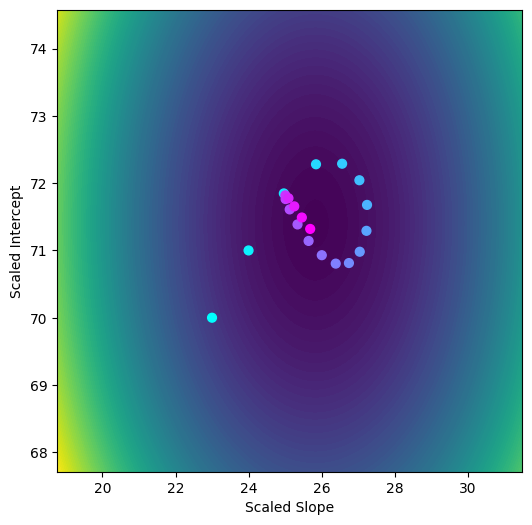

Optimized phi: [25.688513 71.31982 ]
Final loss: 206.2895489821342


In [ ]:
learned_phi = torchOptimizer(phi_init, lr=1, steps=20,optimizer=torch.optim.Adam,plot_descent=True, betas=(0.89, 0.99))

print("Optimized phi:", learned_phi.data.numpy())
print("Final loss:", MSELoss(learned_phi).item())

Ooh, spiral! See? Momentum! Not always a good thing it turns out...

Play with the optimizers and hyperparameters for a bit. Try changing `phi_init` to be farther from the minimum to make it a harder problem in order to put the algorithms through their paces.

In [ ]:
# Your code here
...

### 4. Exercise: Minimize the Beale function

Now for your task: Minimize the Beale function
$f(x,y)=(1.5-x+xy)^2+(2.25-x+xy^2)^2+(2.625-x+xy^3)^2$

This function is commonly used to test new optimization algorithms. I'll even tell you where the minimum is: it's at (3,0.5) and has a value of 0. I want you to find it starting from an initial phi of


*   (3,0.5) (it had better stay put!)
*   (4,-3)
*   (-4,4)
*   (-1,2)
*   (0,0)

Use `torch.optim`'s algorithms. Some algorithms/hyperparameter choices will fail to find the global minimum at some of these points. Others will succeed.

Deliver me the minimum.






In [ ]:
# Your code here
...

## Machine Learning: A Perceptron



The simplest neural network is the perceptron, which attempts to find the hyperplane (a line in 2D, which is what we'll be doing) seperating two clusters of data called "classes". The perceptron is therefore a "classifier".

With 2D points and 2 possible classes, our network will be as simple as it gets: two input nodes and single output neuron, with two weights, a single bias, and a Heaviside step function for our nonlinear activation function. To train it, we will deploy what we've learned about autograd and gradient descent optimization.

In this section, we will:
1. Generate a 2D dataset with two clusters, labeled as class 0 and class 1, and shuffle and split the dataset into training and test sets.
2. Define a simple perceptron model with:
    - Two learnable weights
    - One learnable bias
3. Implement a hinge loss function compatible with labels 0 and 1.
4. Use `torch.optim.Adam` to optimize the perceptron parameters.
5. Evaluate accuracy on both training and test sets.
6. Plot the decision boundary and the data points to visualize how the perceptron separates the classes.

Let's begin!


First, all our imports

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# For reproducibility, set a random seed
torch.manual_seed(41)
np.random.seed(41)

### 1. Generate the Dataset




We'll create two clusters of points in 2D space:
- Class 0: Centered around (0, 0)
- Class 1: Centered around (-2, 2)

We will add a little random noise to make the dataset more interesting.

In [ ]:
# Number of points per class
n_per_class = 100

# Generate cluster for class 0 (centered at (0,0))
class0_data = np.random.randn(n_per_class, 2) * 0.5 + np.array([0, 0])
class0_labels = np.zeros((n_per_class, 1))  # label = 0

# Generate cluster for class 1 (centered at (-2,2))
class1_data = np.random.randn(n_per_class, 2) * 0.5 + np.array([2, 2])
class1_labels = np.ones((n_per_class, 1))   # label = 1

# Concatenate the data and labels
data = np.vstack((class0_data, class1_data))
labels = np.vstack((class0_labels, class1_labels))

# Shuffle the dataset
indices = np.arange(len(data))
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

# Convert to torch tensors
data_tensor = torch.tensor(data, dtype=torch.float32)
labels_tensor = torch.tensor(labels, dtype=torch.float32)

# Split into training and test sets (e.g., 80% train, 20% test)
train_size = int(0.8 * len(data_tensor))
train_data = data_tensor[:train_size]
train_labels = labels_tensor[:train_size]
test_data = data_tensor[train_size:]
test_labels = labels_tensor[train_size:]

print(f"Training data shape: {train_data.shape}")
print(f"Test data shape: {test_data.shape}")

Training data shape: torch.Size([160, 2])
Test data shape: torch.Size([40, 2])


### 2. Define a Perceptron Model




A perceptron is a simple linear model with:
$
z = w_1 x_1 + w_2 x_2 + b
$

Given an input $(x_1, x_2)$, the perceptron's output/logit is $z$.  
We then convert this logit to a predicted class by thresholding at 0:
- If $z \ge 0$, predict class 1
- If $z < 0$, predict class 0

We'll create a custom PyTorch `nn.Module` class with:
- Two weights (`self.w`)
- One bias (`self.b`)

In [ ]:
class Perceptron(torch.nn.Module):
    def __init__(self):
        super(Perceptron, self).__init__()
        # Create two learnable weights and one bias.
        # torch.nn.Parameter makes them trainable parameters that the optimizer can update.
        # Start with random values
        self.w = torch.nn.Parameter(torch.randn(2, dtype=torch.float32))
        self.b = ...

    def forward(self, x):
        """
        x: a tensor of shape (N, 2), where N is the number of samples.
        Returns the raw score (logit) for each sample.
        """
        # Should return x multiplied against w, and added to b
        return ...

    def predict_class(self, x):
        """
        Predict class (0 or 1) by thresholding the logit (x, transformed by self.forward()) at 0.
        """
        logits = ...
        return ...

### 3. Define the Hinge Loss Function




For hinge loss, we typically use labels in $\{-1, +1\}$.  
However, our labels are in $\{0, 1\}$. We can convert them using:
$
y_{\text{binary}} = 2y - 1
$
Then the hinge loss for each example is:
$
L = \max(0, 1 - y_{\text{binary}} \cdot z)
$
where $z$ is the logit (i.e., $w \cdot x + b$).

We'll compute the mean hinge loss over all samples.

In [ ]:
def hinge_loss(logits, labels):
    """
    logits: Raw scores from the perceptron, shape (N,)
    labels: Ground truth labels in {0, 1}, shape (N,1)

    Returns: Mean hinge loss (scalar).
    """
    # Convert labels from {0,1} to {-1,+1}
    y_binary = ...

    # Reshape logits to match labels shape, if needed
    logits = logits.view(-1, 1)  # shape (N,1)

    # Compute hinge loss per sample: max(0, 1 - y_binary * logits)
    loss_per_sample = ...

    # We need to return a scalar, rather than a vector. So, we return the mean over the batch
    return ...

### 4. Training Loop with Adam Optimizer


We'll:
1. Instantiate our perceptron
2. Use Adam as the optimizer
3. Perform several epochs of training
   - Forward pass to get logits
   - Compute hinge loss
   - Backward pass to compute gradients
   - Step the optimizer to update weights and bias
4. Print training progress.


In [ ]:
# Initialize the perceptron model
model = Perceptron()

# Define the optimizer (Adam) and a learning rate (try 0.01). Remember to assign it the model.paramaters() as the values to optimize!
optimizer = ...

# Number of training epochs
epochs = 1000

# Replicate what you did in the gradient descent section, but use the hinge_loss
for epoch in range(epochs):

    loss=...

    # (Optional) Print loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

Epoch 100/1000, Loss: 0.1584
Epoch 200/1000, Loss: 0.0562
Epoch 300/1000, Loss: 0.0358
Epoch 400/1000, Loss: 0.0272
Epoch 500/1000, Loss: 0.0220
Epoch 600/1000, Loss: 0.0185
Epoch 700/1000, Loss: 0.0157
Epoch 800/1000, Loss: 0.0144
Epoch 900/1000, Loss: 0.0138
Epoch 1000/1000, Loss: 0.0132


### 5. Evaluate Accuracy on Training and Test Sets


We get the predicted classes (0 or 1) by thresholding the model logits at 0. Then we compare them to the true labels and compute the fraction of correct predictions.

In [ ]:
# Predict class on training data
train_preds = model.predict_class(train_data)

# Compare to ground truth
train_correct = (train_preds.view(-1, 1) == train_labels).float().sum()
train_accuracy = train_correct / len(train_labels)

print(f"Training Accuracy: {train_accuracy.item()*100:.2f}%")

# Predict class on test data
test_preds = model.predict_class(test_data)

# Compare to ground truth
test_correct = (test_preds.view(-1, 1) == test_labels).float().sum()
test_accuracy = test_correct / len(test_labels)

print(f"Test Accuracy: {test_accuracy.item()*100:.2f}%")


Training Accuracy: 99.37%
Test Accuracy: 100.00%


### 6. Plotting the Decision Boundary



To visualize the decision boundary:
1. Create a grid of points (x, y).
2. For each point in the grid, compute the perceptron's output and predict class.
3. Color the background according to the predicted class (0 or 1).
4. Overlay the training points, coloring them based on their true class.

This shows us how the perceptron has partitioned the 2D space.
When you're done, the plot should look something like this:
![450px-ForwardAccumulationAutomaticDifferentiation.png](https://drive.google.com/uc?export=view&id=14LgPGvP0xLSgPf180ZTJXp_JINF76833)

In [ ]:
# Your code here
...

### Conclusion

We've built a simple perceptron from scratch in PyTorch. We:
- Generated a synthetic dataset of two classes.
- Defined a custom perceptron with two weights and a bias.
- Used a hinge loss function to guide training.
- Optimized using the Adam optimizer.
- Achieved high accuracy on both training and test sets.
- Visualized the decision boundary, confirming that the perceptron separates the data clusters.

This demonstrates the core ideas behind perceptron training and hinge loss in a modern deep learning framework.
